Primeiros 5 valores da coluna 'Valor':
0    66,00262536
1    82,50152388
2    213,0009088
3    66,00262536
4    86,00075756
Name: Valor, dtype: object
Coluna 'Valor' convertida para numérico!
0    66.00
1    82.50
2   213.00
3    66.00
4    86.00
Name: Valor, dtype: float64

Atenção! Existem 2836 linhas duplicadas no dataset.

--- ANÁLISE 1: FREQUÊNCIA DE ENTRADAS (RESERVAS) ---

1.1 Distribuição por Gênero:
           Absoluto  Percentual (%)
Género                             
Masculino    107168           62.78
Feminino      63490           37.20
FALSO            34            0.02
Total        170692          100.00

1.2 Distribuição por Classe:
                  Absoluto  Percentual (%)
Classe                                    
Classe Económica    161002           94.32
Executiva             9397            5.51
Primeira Classe        259            0.15
0                       34            0.02
Total               170692          100.00

1.3 Contagem de Origens, Destinos e Rota

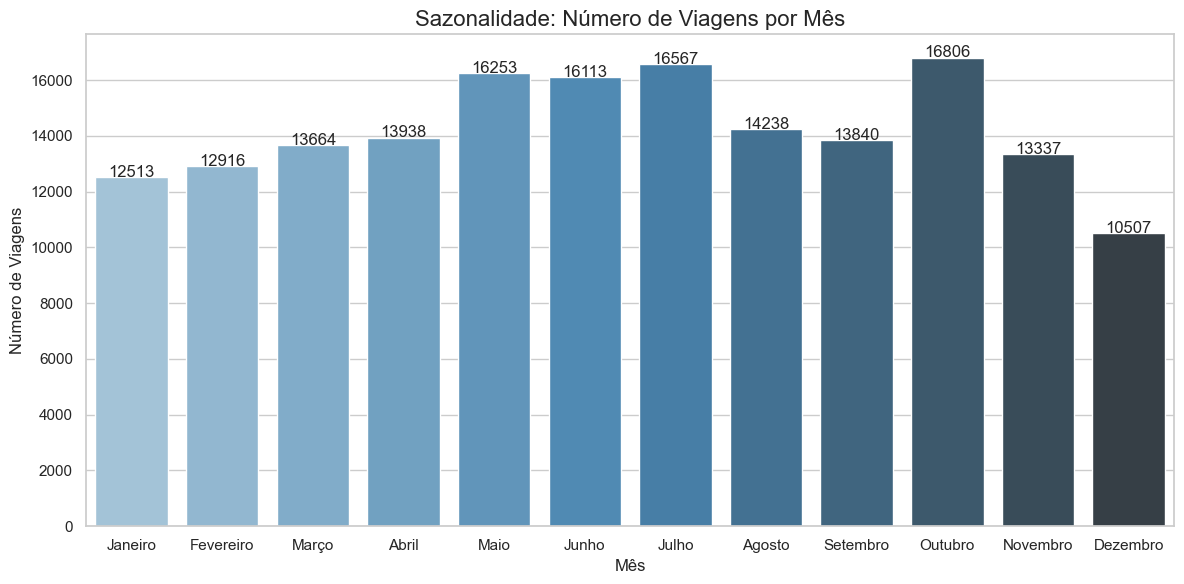

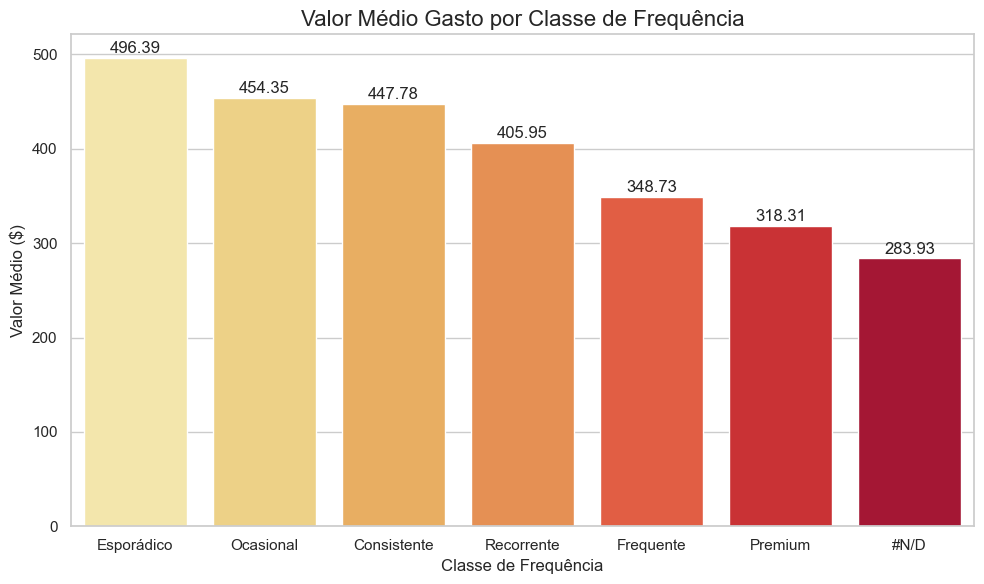


Análise concluída!


In [25]:
# Análise de Dados da Companhia Aérea
# -----------------------------------

# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configurando para exibir valores sem notação científica
pd.set_option('display.float_format', '{:.2f}'.format)

# Configurando o estilo dos gráficos
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configurando o notebook para mostrar as figuras
%matplotlib inline

# Carregando o dataset
# -------------------
df = pd.read_csv("data.csv", parse_dates=['DataValidade'])
data = df.copy()

# Convertendo a coluna 'Valor' para numérico
if 'Valor' in data.columns:
    # Verificamos os primeiros valores
    print("Primeiros 5 valores da coluna 'Valor':")
    print(data['Valor'].head())
    
    # Tentamos converter de diferentes formas
    try:
        data['Valor'] = data['Valor'].astype(str).str.replace(',', '.').astype(float)
    except:
        try:
            data['Valor'] = data['Valor'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
        except:
            data['Valor'] = data['Valor'].astype(str).replace(r'[^\d.,]', '', regex=True)
            data['Valor'] = data['Valor'].str.replace(',', '.').astype(float)
    
    print("Coluna 'Valor' convertida para numérico!")
    print(data['Valor'].head())

# Verificamos duplicatas
if len(data) > len(data.drop_duplicates()):
    print(f"\nAtenção! Existem {len(data) - len(data.drop_duplicates())} linhas duplicadas no dataset.")
else:
    print("\nNão foram encontradas linhas duplicadas no dataset.")

# Colunas auxiliares
data['Cliente_ID'] = data['Contacto']
data['Mes'] = data['DataValidade'].dt.month
data['Ano'] = data['DataValidade'].dt.year

# Análise 1: Frequência de entradas (reservas)
# -------------------------------------------
print("\n--- ANÁLISE 1: FREQUÊNCIA DE ENTRADAS (RESERVAS) ---")

# 1.1 % e absolutos de masculinos e femininos
genero_counts = data['Género'].value_counts()
genero_percent = data['Género'].value_counts(normalize=True) * 100

# Adicionando total
total_genero = genero_counts.sum()
genero_counts_total = genero_counts.copy()
genero_counts_total['Total'] = total_genero
genero_percent_total = genero_percent.copy()
genero_percent_total['Total'] = 100.0

print("\n1.1 Distribuição por Gênero:")
genero_df = pd.DataFrame({
    'Absoluto': genero_counts_total,
    'Percentual (%)': genero_percent_total.round(2)
})
print(genero_df)

# 1.2 % e absolutos por Classe
classe_counts = data['Classe'].value_counts()
classe_percent = data['Classe'].value_counts(normalize=True) * 100

# Adicionando total
total_classe = classe_counts.sum()
classe_counts_total = classe_counts.copy()
classe_counts_total['Total'] = total_classe
classe_percent_total = classe_percent.copy()
classe_percent_total['Total'] = 100.0

print("\n1.2 Distribuição por Classe:")
classe_df = pd.DataFrame({
    'Absoluto': classe_counts_total,
    'Percentual (%)': classe_percent_total.round(2)
})
print(classe_df)

# 1.3 Quantas Origens, destinos e rotas únicas há
origens_unicas = data['Origem'].nunique()
destinos_unicos = data['Destino'].nunique()
rotas_unicas = data['Rota'].nunique()

print("\n1.3 Contagem de Origens, Destinos e Rotas únicas:")
print(f"Origens únicas: {origens_unicas}")
print(f"Destinos únicos: {destinos_unicos}")
print(f"Rotas únicas: {rotas_unicas}")

# 1.4 % e absolutos por nacionalidades
nacionalidade_counts = data['Nacionalidade'].value_counts()
nacionalidade_percent = data['Nacionalidade'].value_counts(normalize=True) * 100

# Adicionando total
total_nacionalidade = nacionalidade_counts.sum()
nacionalidade_counts_total = nacionalidade_counts.copy()
nacionalidade_counts_total['Total'] = total_nacionalidade
nacionalidade_percent_total = nacionalidade_percent.copy()
nacionalidade_percent_total['Total'] = 100.0

print("\n1.4 Distribuição por Nacionalidade:")
nacionalidade_df = pd.DataFrame({
    'Absoluto': nacionalidade_counts_total,
    'Percentual (%)': nacionalidade_percent_total.round(2)
})
print(nacionalidade_df)

# 1.5 Top 5 rotas, origens e destinos
# Top 5 Rotas
top_rotas = data['Rota'].value_counts().nlargest(5)
top_rotas_percent = (top_rotas / len(data) * 100).round(2)

# Calculamos o total
total_rotas = len(data)
top5_total_rotas = top_rotas.sum()
outras_rotas = total_rotas - top5_total_rotas

# Criamos séries separadas para os totais
top_rotas_com_total = top_rotas.copy()
top_rotas_percent_com_total = top_rotas_percent.copy()

# Adicionamos valores nas novas séries
top_rotas_com_total['Outras Rotas'] = outras_rotas
top_rotas_com_total['Total'] = total_rotas
top_rotas_percent_com_total['Outras Rotas'] = (outras_rotas / total_rotas * 100).round(2)
top_rotas_percent_com_total['Total'] = 100.0

print("\n1.5 Top 5 Rotas:")
top_rotas_df = pd.DataFrame({
    'Absoluto': top_rotas_com_total,
    'Percentual (%)': top_rotas_percent_com_total
})
print(top_rotas_df)

# Top 5 Origens
top_origens = data['Origem'].value_counts().nlargest(5)
top_origens_percent = (top_origens / len(data) * 100).round(2)

# Calculamos o total
total_origens = len(data)
top5_total_origens = top_origens.sum()
outras_origens = total_origens - top5_total_origens

# Criamos séries separadas para os totais
top_origens_com_total = top_origens.copy()
top_origens_percent_com_total = top_origens_percent.copy()

# Adicionamos valores nas novas séries
top_origens_com_total['Outras Origens'] = outras_origens
top_origens_com_total['Total'] = total_origens
top_origens_percent_com_total['Outras Origens'] = (outras_origens / total_origens * 100).round(2)
top_origens_percent_com_total['Total'] = 100.0

print("\nTop 5 Origens:")
top_origens_df = pd.DataFrame({
    'Absoluto': top_origens_com_total,
    'Percentual (%)': top_origens_percent_com_total
})
print(top_origens_df)

# Top 5 Destinos
top_destinos = data['Destino'].value_counts().nlargest(5)
top_destinos_percent = (top_destinos / len(data) * 100).round(2)

# Calculamos o total
total_destinos = len(data)
top5_total_destinos = top_destinos.sum()
outros_destinos = total_destinos - top5_total_destinos

# Criamos séries separadas para os totais
top_destinos_com_total = top_destinos.copy()
top_destinos_percent_com_total = top_destinos_percent.copy()

# Adicionamos valores nas novas séries
top_destinos_com_total['Outros Destinos'] = outros_destinos
top_destinos_com_total['Total'] = total_destinos
top_destinos_percent_com_total['Outros Destinos'] = (outros_destinos / total_destinos * 100).round(2)
top_destinos_percent_com_total['Total'] = 100.0

print("\nTop 5 Destinos:")
top_destinos_df = pd.DataFrame({
    'Absoluto': top_destinos_com_total,
    'Percentual (%)': top_destinos_percent_com_total
})
print(top_destinos_df)

# Análise 2: Por cliente único
# ---------------------------
print("\n--- ANÁLISE 2: POR CLIENTE ÚNICO ---")

# 2.1 % e absoluto para cada classe de Frequência
frequencia_counts = data['Frequência'].value_counts()
frequencia_percent = data['Frequência'].value_counts(normalize=True) * 100

# Adicionando total
total_frequencia = frequencia_counts.sum()
frequencia_counts_total = frequencia_counts.copy()
frequencia_counts_total['Total'] = total_frequencia
frequencia_percent_total = frequencia_percent.copy()
frequencia_percent_total['Total'] = 100.0

print("\n2.1 Distribuição por Classe de Frequência:")
frequencia_df = pd.DataFrame({
    'Absoluto': frequencia_counts_total,
    'Percentual (%)': frequencia_percent_total.round(2)
})
print(frequencia_df)

# Clientes únicos por frequência
clientes_por_frequencia = data.drop_duplicates(subset='Cliente_ID')['Frequência'].value_counts()
clientes_por_frequencia_percent = (clientes_por_frequencia / clientes_por_frequencia.sum() * 100).round(2)

# Adicionando total
total_clientes_freq = clientes_por_frequencia.sum()
clientes_por_frequencia_total = clientes_por_frequencia.copy()
clientes_por_frequencia_total['Total'] = total_clientes_freq
clientes_por_frequencia_percent_total = clientes_por_frequencia_percent.copy()
clientes_por_frequencia_percent_total['Total'] = 100.0

print("\nDistribuição de Clientes Únicos por Classe de Frequência:")
clientes_frequencia_df = pd.DataFrame({
    'Absoluto': clientes_por_frequencia_total,
    'Percentual (%)': clientes_por_frequencia_percent_total
})
print(clientes_frequencia_df)

# 2.2 Por frequência e Nacionalidade
clientes_unicos_df = data.drop_duplicates(subset='Cliente_ID')[['Cliente_ID', 'Frequência', 'Nacionalidade', 'Género']]
freq_nac_abs = pd.crosstab(clientes_unicos_df['Frequência'], clientes_unicos_df['Nacionalidade'])

# Adicionando totais
freq_nac_abs['Total'] = freq_nac_abs.sum(axis=1)
freq_nac_abs.loc['Total'] = freq_nac_abs.sum()

print("\n2.2 Distribuição absoluta de Nacionalidades por Classe de Frequência:")
print(freq_nac_abs)

# Valores percentuais
freq_nac = pd.crosstab(
    clientes_unicos_df['Frequência'], 
    clientes_unicos_df['Nacionalidade'], 
    normalize='index'
) * 100

print("\nDistribuição percentual de Nacionalidades por Classe de Frequência:")
print(freq_nac.round(2))

# 2.3 Por frequência e Gênero
freq_gen_abs = pd.crosstab(clientes_unicos_df['Frequência'], clientes_unicos_df['Género'])

# Adicionando totais
freq_gen_abs['Total'] = freq_gen_abs.sum(axis=1)
freq_gen_abs.loc['Total'] = freq_gen_abs.sum()

print("\n2.3 Distribuição absoluta de Gênero por Classe de Frequência:")
print(freq_gen_abs)

# Valores percentuais
freq_gen = pd.crosstab(
    clientes_unicos_df['Frequência'], 
    clientes_unicos_df['Género'], 
    normalize='index'
) * 100

print("\nDistribuição percentual de Gênero por Classe de Frequência:")
print(freq_gen.round(2))

# 2.4 Por Classe
classes_por_cliente = data.groupby('Cliente_ID')['Classe'].nunique()
clientes_mistas = classes_por_cliente[classes_por_cliente > 1].index
data['Classe_Cliente'] = data['Classe']
data.loc[data['Cliente_ID'].isin(clientes_mistas), 'Classe_Cliente'] = 'Mistas'
classe_cliente_counts = data.drop_duplicates(subset='Cliente_ID')['Classe_Cliente'].value_counts()
classe_cliente_percent = (classe_cliente_counts / classe_cliente_counts.sum() * 100).round(2)

# Adicionando total
total_classe_cliente = classe_cliente_counts.sum()
classe_cliente_counts_total = classe_cliente_counts.copy()
classe_cliente_counts_total['Total'] = total_classe_cliente
classe_cliente_percent_total = classe_cliente_percent.copy()
classe_cliente_percent_total['Total'] = 100.0

print("\n2.4 Distribuição de Clientes por Classe de Viagem:")
classe_cliente_df = pd.DataFrame({
    'Absoluto': classe_cliente_counts_total,
    'Percentual (%)': classe_cliente_percent_total
})
print(classe_cliente_df)

# 2.5 Distribuição por frequência e classe
clientes_freq_classe = data.drop_duplicates(subset='Cliente_ID')[['Cliente_ID', 'Frequência', 'Classe_Cliente']]
freq_classe_abs = pd.crosstab(clientes_freq_classe['Frequência'], clientes_freq_classe['Classe_Cliente'])

# Adicionando totais
freq_classe_abs['Total'] = freq_classe_abs.sum(axis=1)
freq_classe_abs.loc['Total'] = freq_classe_abs.sum()

print("\n2.5 Distribuição absoluta de Classes por Frequência:")
print(freq_classe_abs)

# Valores percentuais
freq_classe = pd.crosstab(
    clientes_freq_classe['Frequência'], 
    clientes_freq_classe['Classe_Cliente'], 
    normalize='index'
) * 100

print("\nDistribuição percentual de Classes por Frequência:")
print(freq_classe.round(2))

# 2.6 Top 5 rotas por mercado
print("\n2.6 Top 5 rotas por mercado:")
mercados = data['Mercado'].unique()
for mercado in mercados:
    top_rotas_mercado = data[data['Mercado'] == mercado]['Rota'].value_counts().nlargest(5)
    top_rotas_mercado_percent = (top_rotas_mercado / len(data[data['Mercado'] == mercado]) * 100).round(2)
    
    print(f"\nTop 5 Rotas para o mercado {mercado}:")
    top_rotas_mercado_df = pd.DataFrame({
        'Absoluto': top_rotas_mercado,
        'Percentual (%)': top_rotas_mercado_percent
    })
    print(top_rotas_mercado_df)

# 2.7 Valor obtido por mês por mercado
# Nomes dos meses
meses_nomes = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
data['Mes_Nome'] = data['Mes'].map(meses_nomes)

# Valor total por mês por mercado - sem formatação especial para mostrar os valores normais
valor_mes_mercado = data.pivot_table(
    values='Valor', 
    index='Mes_Nome', 
    columns='Mercado', 
    aggfunc='sum'
)

# Ordenamos os meses
ordem_meses = [meses_nomes[i] for i in range(1, 13) if meses_nomes[i] in valor_mes_mercado.index]
valor_mes_mercado = valor_mes_mercado.reindex(ordem_meses)

# Adicionando total por mês
valor_mes_mercado['Total'] = valor_mes_mercado.sum(axis=1)

# Adicionando total por mercado
valor_mes_mercado.loc['Total'] = valor_mes_mercado.sum()

print("\n2.7 Valor total por mês por mercado:")
print(valor_mes_mercado)

# Análises adicionais
# ------------------
print("\n--- ANÁLISES ADICIONAIS ---")

# Gasto médio por cliente
gasto_medio_cliente = data.groupby('Cliente_ID')['Valor'].mean()
print(f"\nGasto médio por cliente: {gasto_medio_cliente.mean():.2f}")

# Gasto total por nacionalidade e classe
gasto_nac_classe = data.groupby(['Nacionalidade', 'Classe'])['Valor'].sum().unstack()

# Adicionando totais
gasto_nac_classe['Total'] = gasto_nac_classe.sum(axis=1)
gasto_nac_classe.loc['Total'] = gasto_nac_classe.sum()

print("\nGasto total por nacionalidade e classe:")
print(gasto_nac_classe)

# Sazonalidade: Número de viagens por mês
viagens_por_mes = data['Mes'].value_counts().sort_index()
viagens_por_mes.index = [meses_nomes[i] for i in viagens_por_mes.index]

print("\nNúmero de viagens por mês:")
print(viagens_por_mes)

# Valor médio gasto por classe de frequência
valor_medio_freq = data.groupby('Frequência')['Valor'].mean().sort_values(ascending=False)
print("\nValor médio gasto por classe de frequência:")
print(valor_medio_freq)

# Relação entre Mercado e Classe
mercado_classe_abs = pd.crosstab(data['Mercado'], data['Classe'])
mercado_classe_abs['Total'] = mercado_classe_abs.sum(axis=1)
mercado_classe_abs.loc['Total'] = mercado_classe_abs.sum()

print("\nDistribuição absoluta de Classes por Mercado:")
print(mercado_classe_abs)

# Valores percentuais
mercado_classe = pd.crosstab(data['Mercado'], data['Classe'], normalize='index') * 100
print("\nDistribuição percentual de Classes por Mercado:")
print(mercado_classe.round(2))

# VISUALIZAÇÕES
# ------------
print("\n--- VISUALIZAÇÕES ---")

# Visualização 12: Sazonalidade - Número de viagens por mês
plt.figure(figsize=(12, 6))
viagens_mes_df = pd.DataFrame({'Mês': viagens_por_mes.index, 'Viagens': viagens_por_mes.values})
ax = sns.barplot(x='Mês', y='Viagens', hue='Mês', data=viagens_mes_df, palette='Blues_d', legend=False)
for i, v in enumerate(viagens_por_mes.values):
    ax.text(i, v + 10, str(v), ha='center')
plt.title('Sazonalidade: Número de Viagens por Mês', fontsize=16)
plt.xlabel('Mês')
plt.ylabel('Número de Viagens')
plt.tight_layout()
plt.show()

# Visualização 14: Valor médio por classe de frequência
plt.figure(figsize=(10, 6))
valor_medio_df = pd.DataFrame({'Frequência': valor_medio_freq.index, 'Valor_Médio': valor_medio_freq.values})
ax = sns.barplot(x='Frequência', y='Valor_Médio', hue='Frequência', data=valor_medio_df, palette='YlOrRd', legend=False)
for i, v in enumerate(valor_medio_freq.values):
    ax.text(i, v + 5, f"{v:.2f}", ha='center')
plt.title('Valor Médio Gasto por Classe de Frequência', fontsize=16)
plt.xlabel('Classe de Frequência')
plt.ylabel('Valor Médio ($)')
plt.tight_layout()
plt.show()

print("\nAnálise concluída!")


Soma do valor gasto por classe de frequência:
Frequência
Ocasional     30987260.57
Esporádico    26976747.24
Recorrente    10195379.47
Frequente      4500361.00
Consistente    1854717.73
Premium        1637068.61
#N/D            238498.33
Name: Valor, dtype: float64

Soma do valor gasto por classe de frequência (com total):
Frequência
Ocasional     30987260.57
Esporádico    26976747.24
Recorrente    10195379.47
Frequente      4500361.00
Consistente    1854717.73
Premium        1637068.61
#N/D            238498.33
Total         76390032.96
Name: Valor, dtype: float64


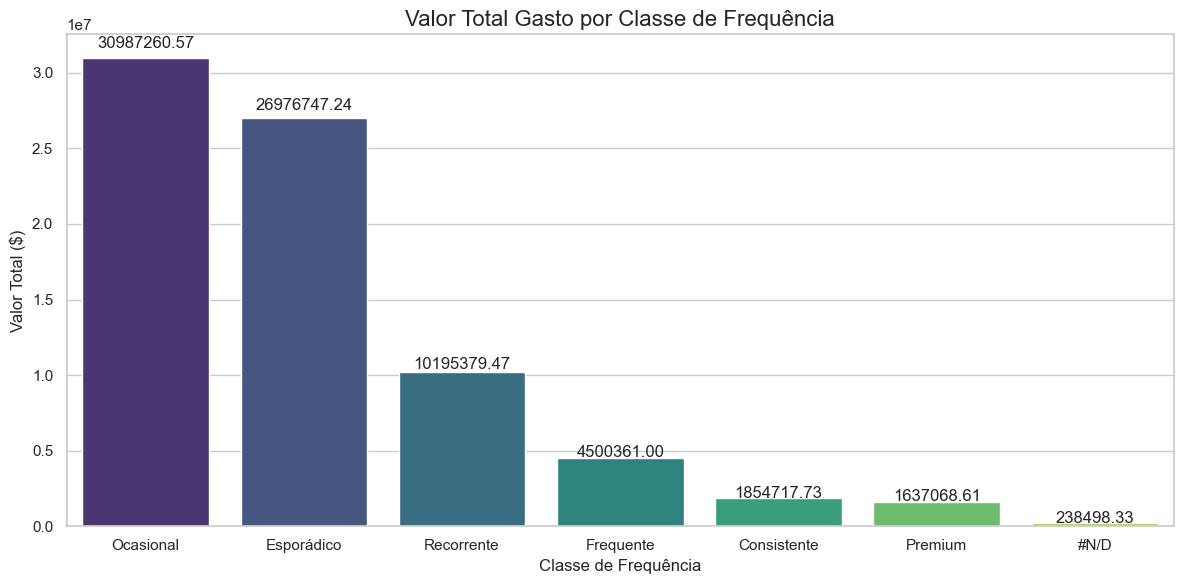

In [27]:
# Soma do valor gasto por classe de frequência
valor_soma_freq = data.groupby('Frequência')['Valor'].sum().sort_values(ascending=False)

print("\nSoma do valor gasto por classe de frequência:")
print(valor_soma_freq)

# Se quiseres adicionar um total
valor_soma_freq_total = valor_soma_freq.copy()
valor_soma_freq_total['Total'] = valor_soma_freq.sum()

print("\nSoma do valor gasto por classe de frequência (com total):")
print(valor_soma_freq_total)

# Gráfico para a soma do valor gasto por classe de frequência
plt.figure(figsize=(12, 6))
valor_soma_df = pd.DataFrame({'Frequência': valor_soma_freq.index, 'Valor_Total': valor_soma_freq.values})
ax = sns.barplot(x='Frequência', y='Valor_Total', hue='Frequência', data=valor_soma_df, palette='viridis', legend=False)

# Adicionando rótulos
for i, v in enumerate(valor_soma_freq.values):
    ax.text(i, v + (v*0.02), f"{v:.2f}", ha='center')

plt.title('Valor Total Gasto por Classe de Frequência', fontsize=16)
plt.xlabel('Classe de Frequência')
plt.ylabel('Valor Total ($)')
plt.tight_layout()
plt.show()


Soma do valor gasto por classe de frequência:


Frequência
Ocasional     30987260.57
Esporádico    26976747.24
Recorrente    10195379.47
Frequente      4500361.00
Consistente    1854717.73
Premium        1637068.61
#N/D            238498.33
Name: Valor, dtype: float64


Soma do valor gasto por classe de frequência (com total):


Frequência
Ocasional     30987260.57
Esporádico    26976747.24
Recorrente    10195379.47
Frequente      4500361.00
Consistente    1854717.73
Premium        1637068.61
#N/D            238498.33
Total         76390032.96
Name: Valor, dtype: float64

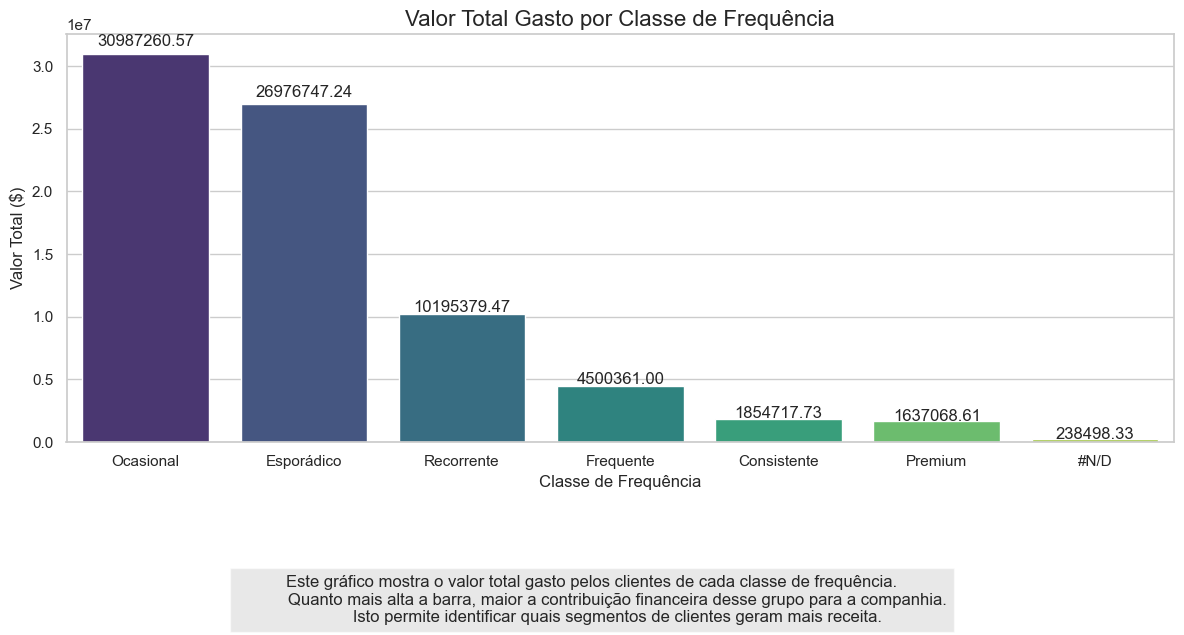


Distribuição de Classes por Nacionalidade:


Classe,Classe Económica,Executiva,Primeira Classe
Nacionalidade,,,
Angolana,151411,8423,244
Namibiana,102,0,0
Outra,5439,618,7
Portuguesa,3704,314,8
Sul Africana,346,42,0



Distribuição percentual de Classes por Nacionalidade:


Classe,Classe Económica,Executiva,Primeira Classe
Nacionalidade,,,
Angolana,94.59,5.26,0.15
Namibiana,100.00,0.00,0.00
Outra,89.69,10.19,0.12
Portuguesa,92.00,7.80,0.20
Sul Africana,89.18,10.82,0.00


<Figure size 1400x800 with 0 Axes>

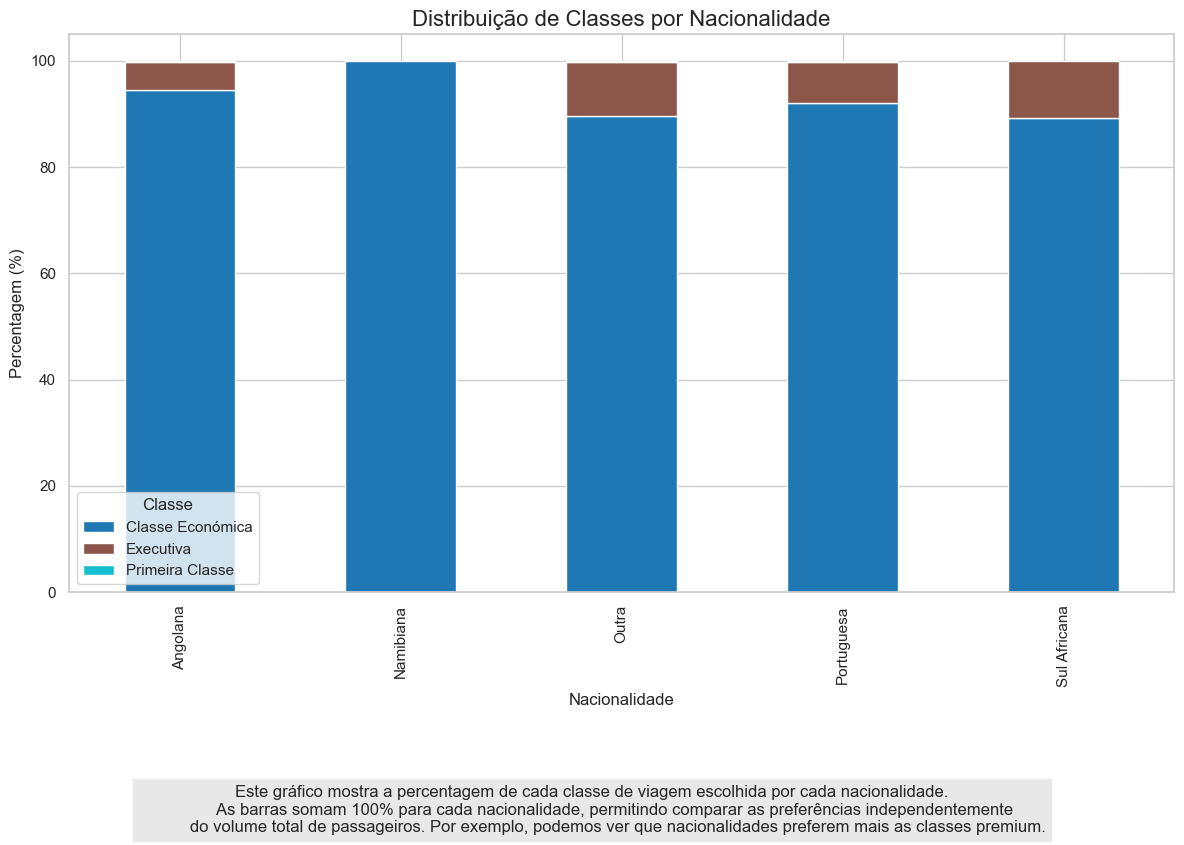


Sazonalidade por nacionalidade (percentagem):


Nacionalidade,Angolana,Namibiana,Outra,Portuguesa,Sul Africana
Mes_Nome,,,,,
Abril,8.16,3.92,7.09,10.48,6.19
Agosto,8.38,3.92,8.69,6.14,10.57
Dezembro,6.13,4.90,7.29,5.59,4.38
Fevereiro,7.49,6.86,7.73,10.41,7.47
Janeiro,7.32,15.69,7.01,7.95,7.47
Julho,9.81,4.90,8.10,8.10,9.02
Junho,9.48,13.73,9.61,7.77,7.73
Maio,9.52,12.75,9.71,9.79,5.41
Março,7.97,8.82,7.80,9.71,7.22


<Figure size 1500x800 with 0 Axes>

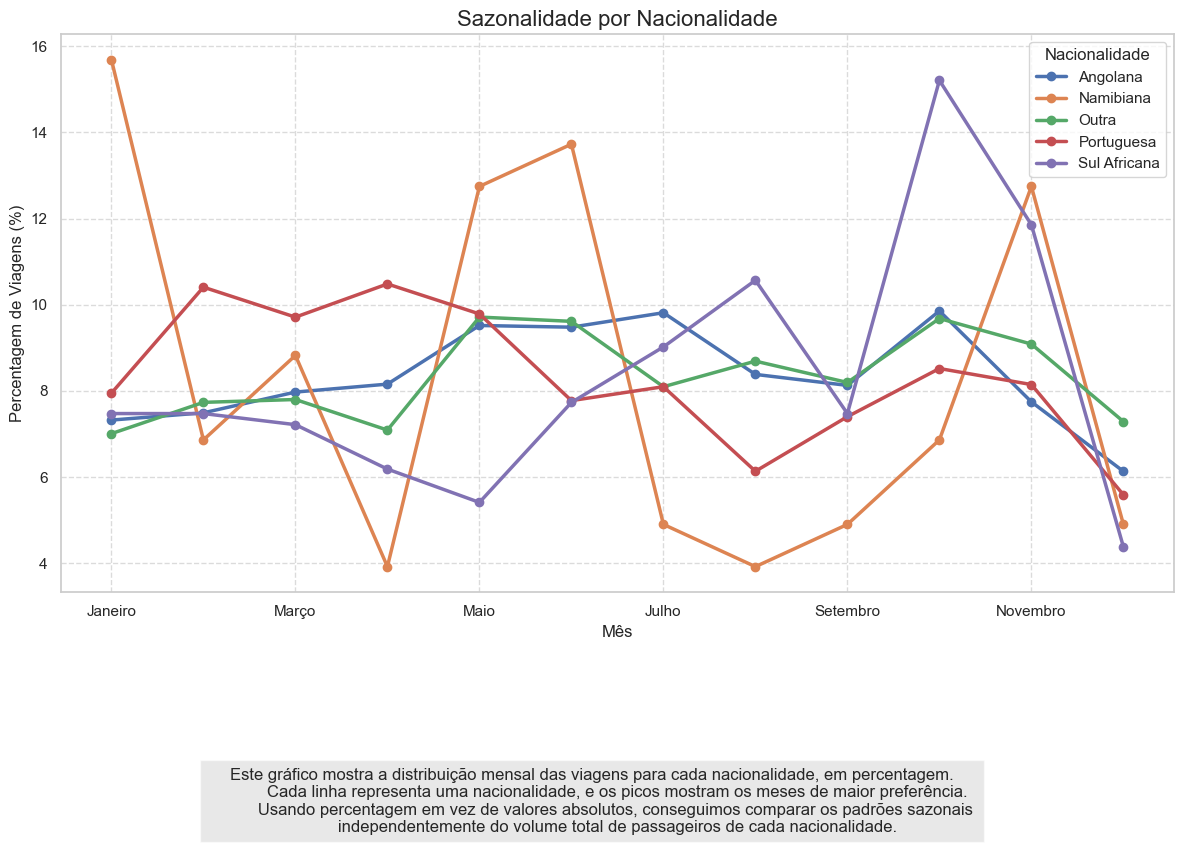


Combinação de Frequência, Nacionalidade e Classe (contagem de clientes):


Classe_Cliente             Classe Económica  Executiva  Mistas  \
Frequência  Nacionalidade                                        
#N/D        Angolana                      1          0       1   
Consistente Angolana                     29          0      60   
            Outra                         1          0       4   
            Portuguesa                    1          0       3   
            Sul Africana                  0          0       1   
Esporádico  Angolana                  45128       1351     258   
            Namibiana                    24          0       0   
            Outra                       907         62      13   
            Portuguesa                  976         50       6   
            Sul Africana                 43          3       1   
Frequente   Angolana                    324          1     271   
            Outra                        14          0      13   
            Portuguesa                    6          0       9   
            Sul Africana                  1          0       0   
Ocasional   Angolana                  18750        148    1860   
            Namibiana                    14          0       0   
            Outra                       398          7      85   
            Portuguesa                  444          8      66   
            Sul Africana                 22          0       4   
Premium     Angolana                      8          0      43   
            Outra                         1          0       5   
            Portuguesa                    0          0       3   
            Sul Africana                  0          0       1   
Recorrente  Angolana                   2035          2     655   
            Namibiana                     1          0       2   
            Outra                        47          1      29   
            Portuguesa                   42          0      25   
            Sul Africana                  1          0       3   

Classe_Cliente             Primeira Classe  
Frequência  Nacionalidade                   
#N/D        Angolana                     0  
Consistente Angolana                     0  
            Outra                        0  
            Portuguesa                   0  
            Sul Africana                 0  
Esporádico  Angolana                    50  
            Namibiana                    0  
            Outra                        0  
            Portuguesa                   3  
            Sul Africana                 0  
Frequente   Angolana                     0  
            Outra                        0  
            Portuguesa                   0  
            Sul Africana                 0  
Ocasional   Angolana                     4  
            Namibiana                    0  
            Outra                        1  
            Portuguesa                   0  
            Sul Africana                 0  
Premium     Angolana                     0  
            Outra                        0  
            Portuguesa                   0  
            Sul Africana                 0  
Recorrente  Angolana                     0  
            Namibiana                    0  
            Outra                        0  
            Portuguesa                   0  
            Sul Africana                 0


Gasto médio por combinação de Frequência, Nacionalidade e Classe:


Frequência   Nacionalidade  Classe_Cliente  
#N/D         Angolana       Classe Económica    150.00
                            Mistas              283.21
Consistente  Angolana       Classe Económica    236.23
                            Mistas              469.99
             Outra          Classe Económica     92.95
                                                 ...  
Recorrente   Outra          Mistas              515.44
             Portuguesa     Classe Económica    691.94
                            Mistas              854.29
             Sul Africana   Classe Económica    284.80
                            Mistas             1208.02
Name: Gasto_Médio, Length: 64, dtype: float64


Top 10 segmentos por valor total gasto:


Frequência  Nacionalidade  Classe_Cliente  
Esporádico  Angolana       Classe Económica   20905789.63
Ocasional   Angolana       Classe Económica    7643090.65
Esporádico  Angolana       Executiva           1584321.73
Ocasional   Angolana       Mistas              1495828.29
Esporádico  Portuguesa     Classe Económica     779999.37
            Outra          Classe Económica     651953.39
Recorrente  Angolana       Classe Económica     590355.58
                           Mistas               433622.44
Ocasional   Portuguesa     Classe Económica     329994.45
            Outra          Classe Económica     248264.44
Name: Gasto_Médio, dtype: float64

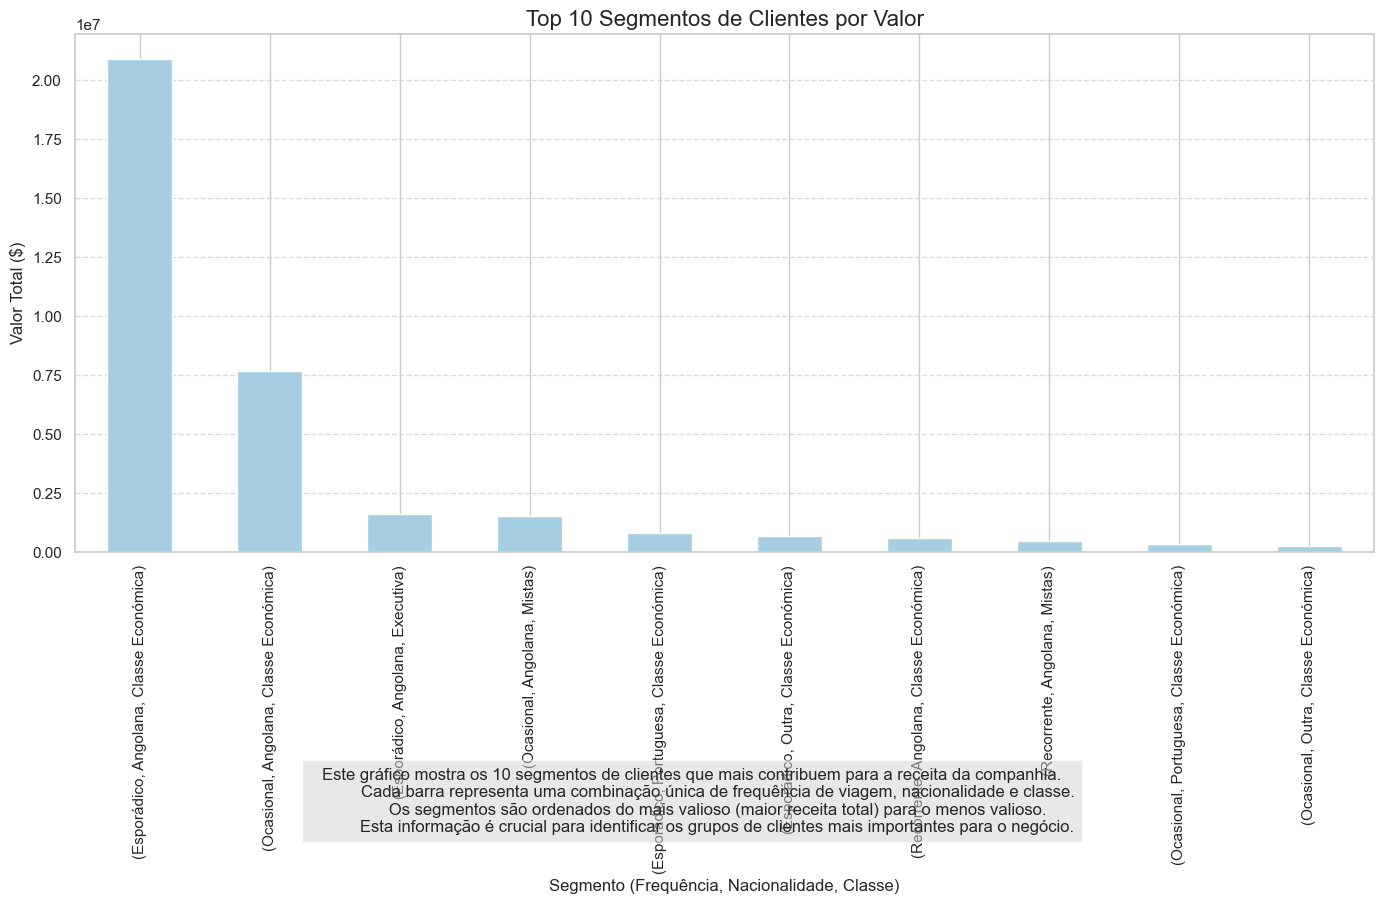


Preferência de mercado por tipo de cliente:


Mercado,#N/D,Domestic,Intercontinental,Regional
Frequência,,,,
#N/D,0,2,0,0
Consistente,0,85,8,6
Esporádico,1,29222,14816,4836
Frequente,0,516,84,39
Ocasional,1,13786,6062,1962
Premium,0,52,5,4
Recorrente,0,2079,516,248



Preferência de mercado por tipo de cliente (percentual):


Mercado,#N/D,Domestic,Intercontinental,Regional
Frequência,,,,
#N/D,0.00,100.00,0.00,0.00
Consistente,0.00,85.86,8.08,6.06
Esporádico,0.00,59.79,30.31,9.89
Frequente,0.00,80.75,13.15,6.10
Ocasional,0.00,63.21,27.79,9.00
Premium,0.00,85.25,8.20,6.56
Recorrente,0.00,73.13,18.15,8.72


<Figure size 1200x700 with 0 Axes>

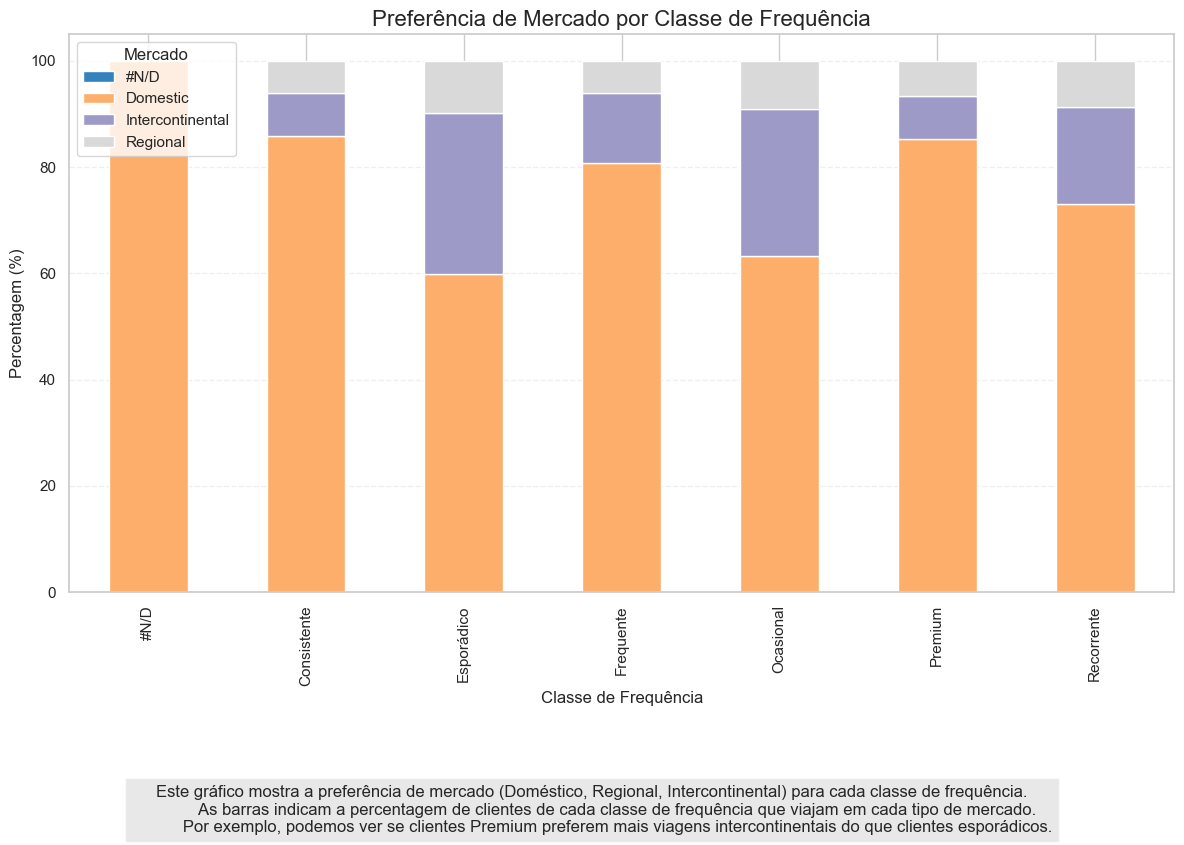


Características médias por cluster:


,Gasto_Médio,Num_Viagens,Perc_Premium,Perc_Domestic,Perc_Intercont,Perc_Regional
Cluster,,,,,,
0,132.94,2.57,0.74,97.64,1.78,0.58
1,1010.61,1.84,0.54,3.75,95.42,0.82
2,1149.07,2.47,81.24,58.79,33.09,8.11
3,935.48,1.78,0.72,5.79,4.55,89.66


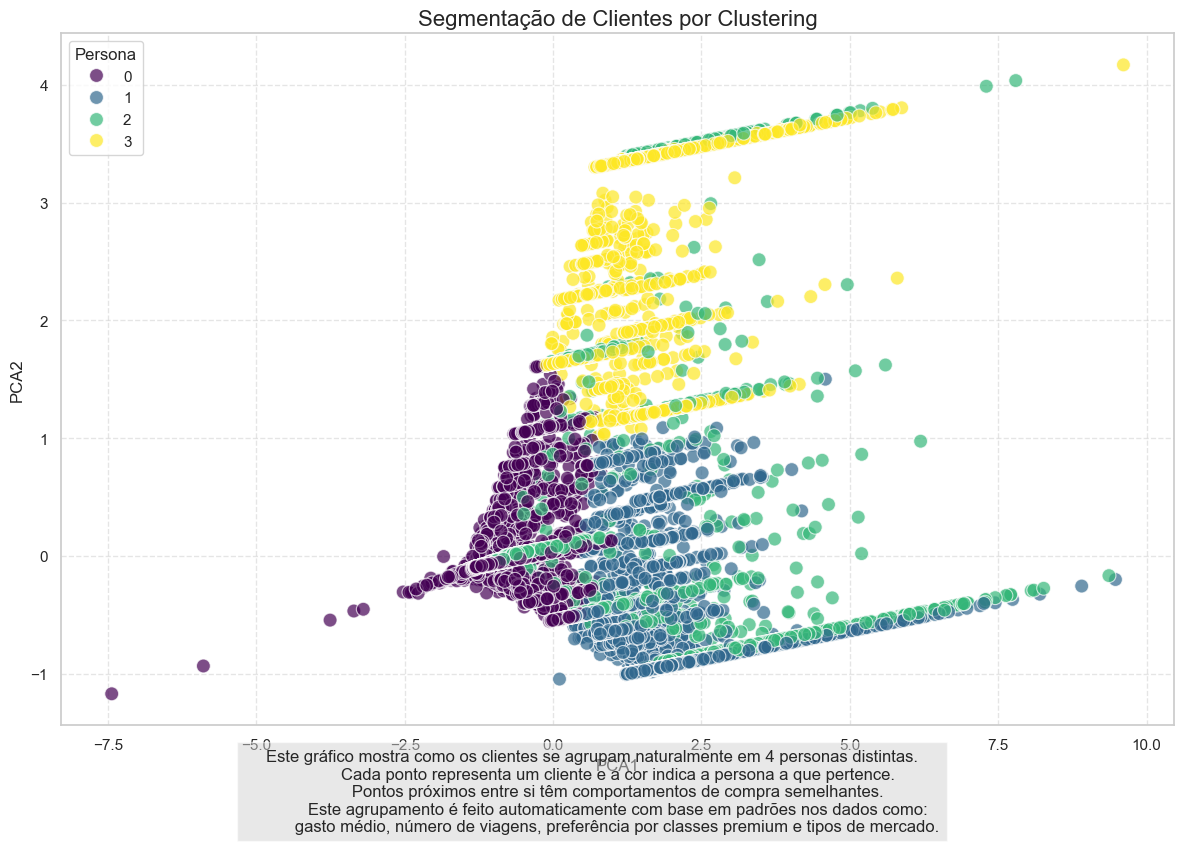


Distribuição de gênero por cluster:


Género,Feminino,Masculino
Cluster,,
0,37.90,62.10
1,42.09,57.91
2,34.36,65.64
3,42.28,57.72



Distribuição de nacionalidade por cluster:


Nacionalidade,Angolana,Namibiana,Outra,Portuguesa,Sul Africana
Cluster,,,,,
0,97.16,0.05,1.71,1.02,0.06
1,92.59,0.03,2.53,4.80,0.05
2,91.91,0.04,4.29,3.54,0.21
3,94.71,0.16,2.85,1.72,0.56



Distribuição de classe por cluster:


Classe_Cliente,Classe Económica,Executiva,Mistas,Primeira Classe
Cluster,,,,
0,96.31,0.00,3.64,0.05
1,97.49,0.00,2.36,0.15
2,0.00,58.45,41.55,0.00
3,97.52,0.00,2.42,0.06



Distribuição de frequência por cluster:


Frequência,#N/D,Consistente,Esporádico,Frequente,Ocasional,Premium,Recorrente
Cluster,,,,,,,
0,0.00,0.18,63.53,1.22,30.12,0.13,4.81
1,0.00,0.05,70.64,0.31,26.81,0.01,2.18
2,0.00,0.21,59.63,0.82,35.18,0.07,4.08
3,0.00,0.01,68.22,0.16,29.41,0.01,2.19


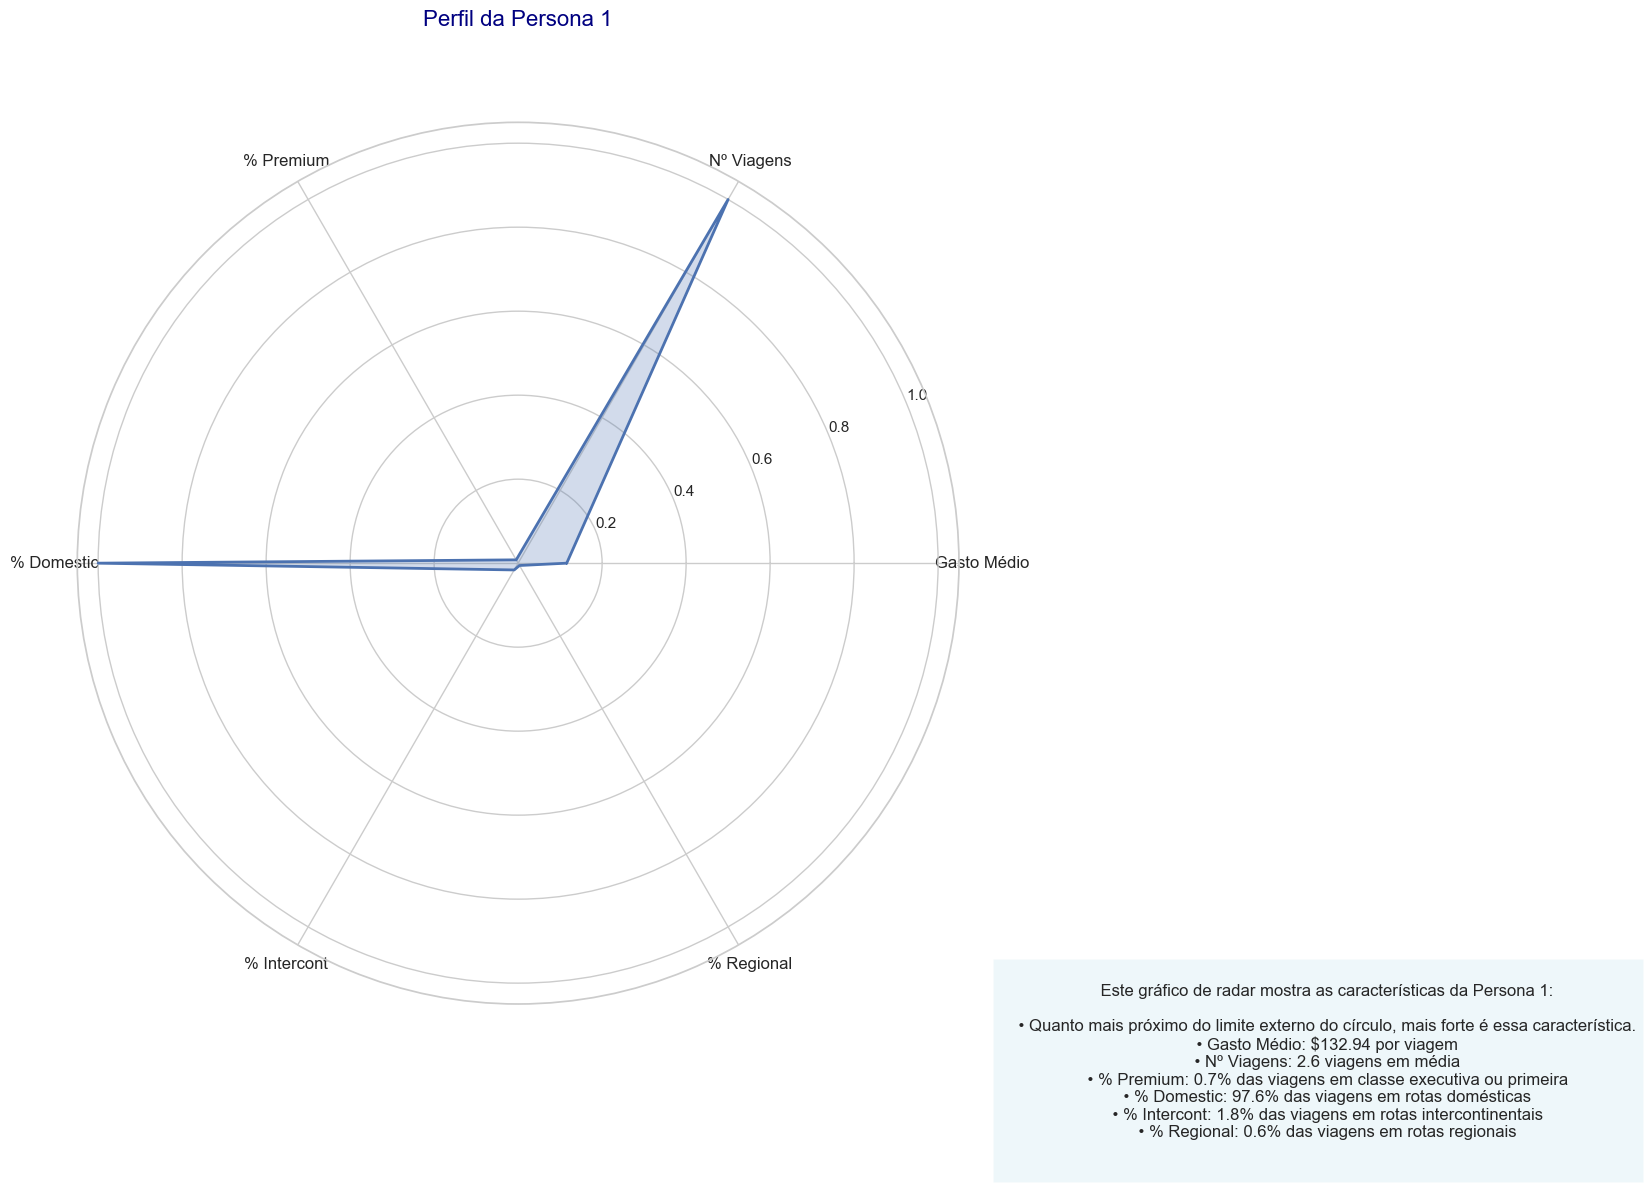

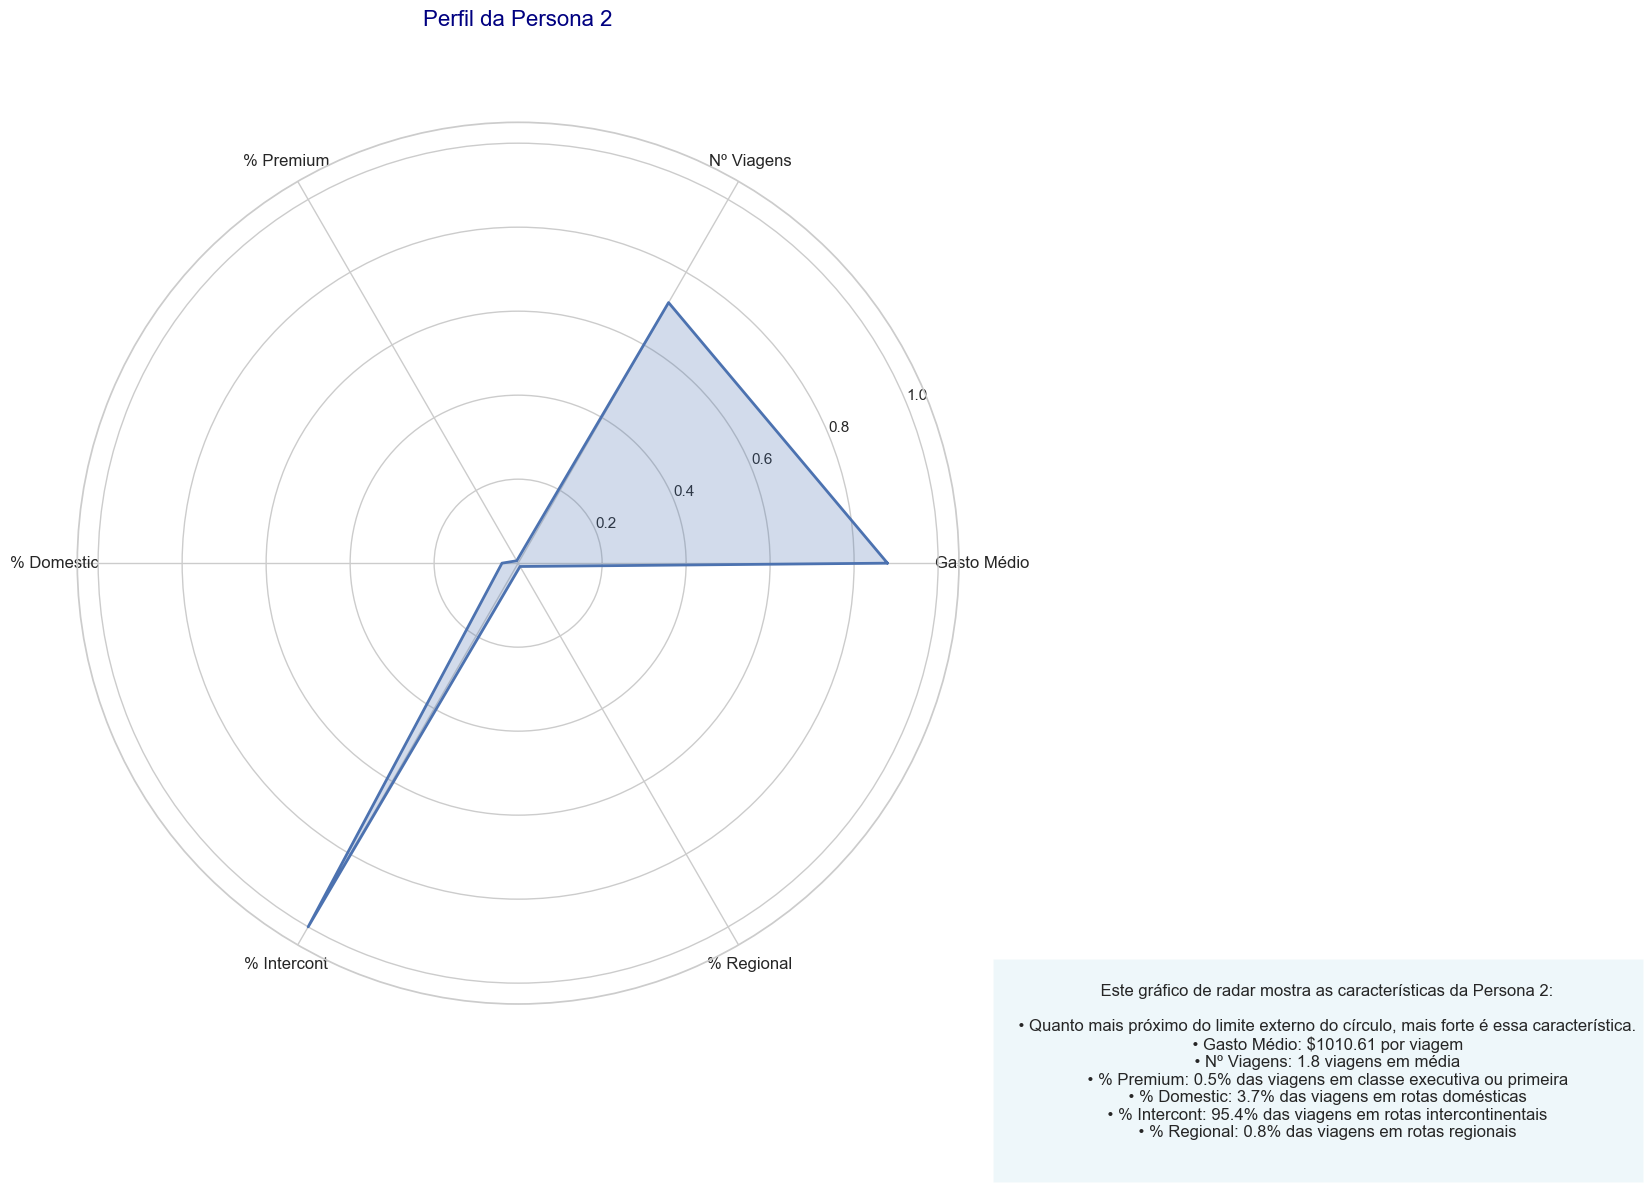

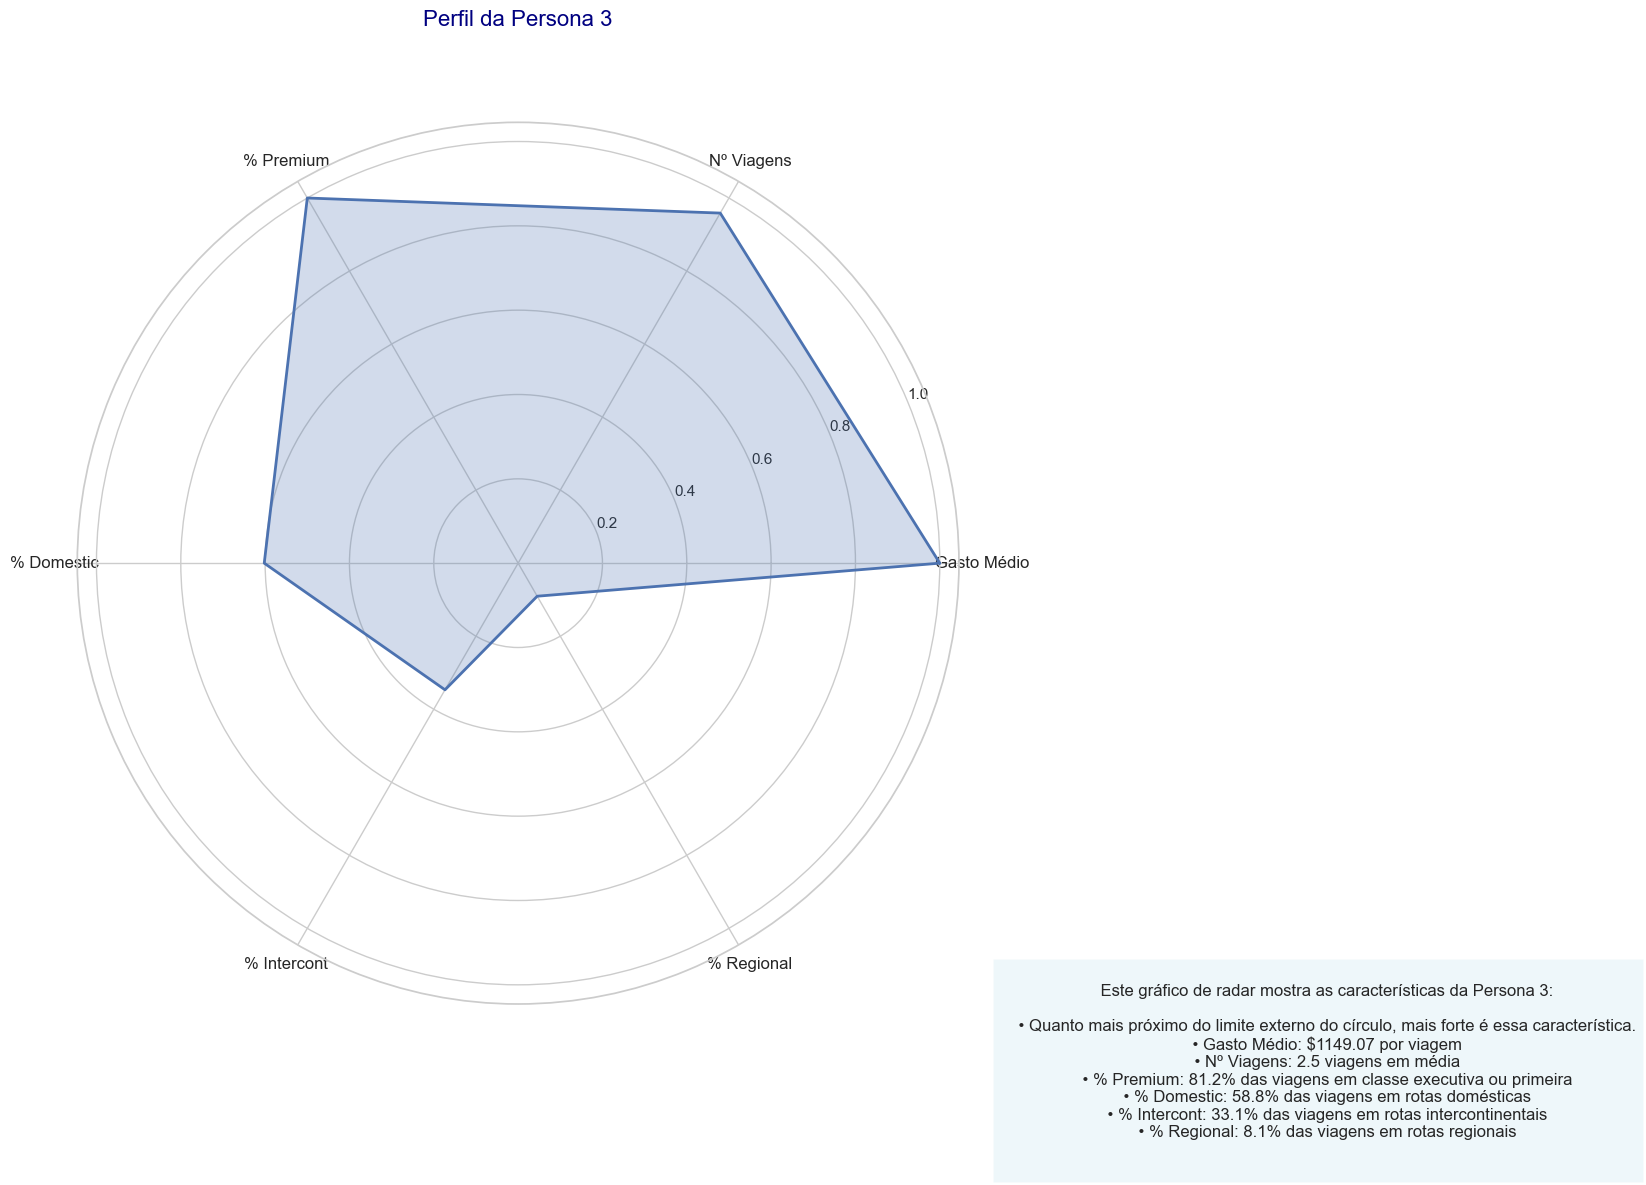

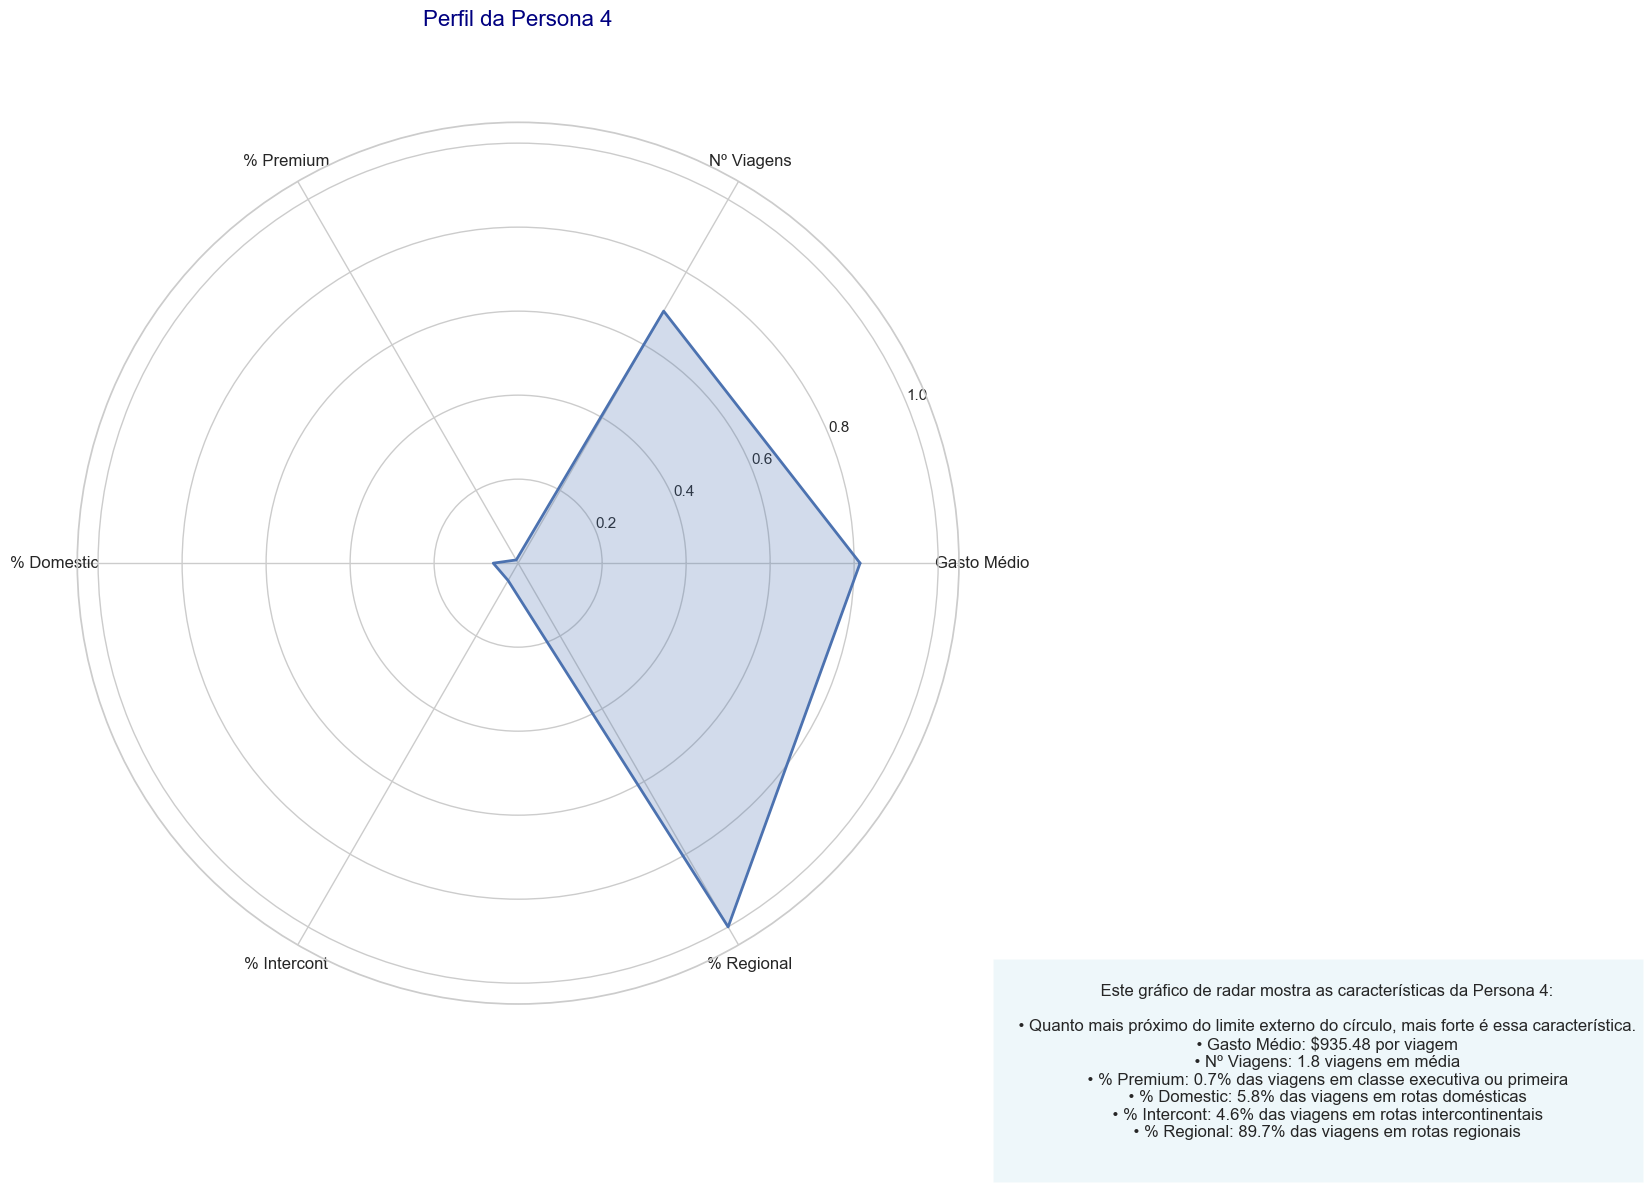


=== PERSONAS IDENTIFICADAS ===

PERSONA 1:
  • Perfil: 62.1% masculino, 97.2% angolana, 63.5% viajante esporádico
  • Preferência: 96.3% classe classe económica, 97.6% mercado doméstico
  • Comportamento: Gasto médio $132.94, média de 2.6 viagens
  • Característica distintiva: 0.7% das viagens em classes premium

PERSONA 2:
  • Perfil: 57.9% masculino, 92.6% angolana, 70.6% viajante esporádico
  • Preferência: 97.5% classe classe económica, 95.4% mercado intercontinental
  • Comportamento: Gasto médio $1010.61, média de 1.8 viagens
  • Característica distintiva: 0.5% das viagens em classes premium

PERSONA 3:
  • Perfil: 65.6% masculino, 91.9% angolana, 59.6% viajante esporádico
  • Preferência: 58.4% classe executiva, 58.8% mercado doméstico
  • Comportamento: Gasto médio $1149.07, média de 2.5 viagens
  • Característica distintiva: 81.2% das viagens em classes premium

PERSONA 4:
  • Perfil: 57.7% masculino, 94.7% angolana, 68.2% viajante esporádico
  • Preferência: 97.5% classe cla

In [41]:
# Análise para Criação de Personas (Melhorada)
# -----------------------------------

# Importar display para melhorar a visualização das tabelas
from IPython.display import display

# Análise 1: Soma do valor gasto por classe de frequência (com visual)
# ------------------------------------------------------------
# Soma do valor gasto por classe de frequência
valor_soma_freq = data.groupby('Frequência')['Valor'].sum().sort_values(ascending=False)

print("\nSoma do valor gasto por classe de frequência:")
display(valor_soma_freq)

# Se quiseres adicionar um total
valor_soma_freq_total = valor_soma_freq.copy()
valor_soma_freq_total['Total'] = valor_soma_freq.sum()

print("\nSoma do valor gasto por classe de frequência (com total):")
display(valor_soma_freq_total)

# Gráfico para a soma do valor gasto por classe de frequência
plt.figure(figsize=(12, 6))
valor_soma_df = pd.DataFrame({'Frequência': valor_soma_freq.index, 'Valor_Total': valor_soma_freq.values})
ax = sns.barplot(x='Frequência', y='Valor_Total', hue='Frequência', data=valor_soma_df, palette='viridis', legend=False)

# Adicionando rótulos
for i, v in enumerate(valor_soma_freq.values):
    ax.text(i, v + (v*0.02), f"{v:.2f}", ha='center')

plt.title('Valor Total Gasto por Classe de Frequência', fontsize=16)
plt.xlabel('Classe de Frequência')
plt.ylabel('Valor Total ($)')
plt.tight_layout()

# Adicionar explicação
plt.figtext(0.5, -0.05, 
           """Este gráfico mostra o valor total gasto pelos clientes de cada classe de frequência.
           Quanto mais alta a barra, maior a contribuição financeira desse grupo para a companhia.
           Isto permite identificar quais segmentos de clientes geram mais receita.""",
           ha="center", fontsize=12, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

plt.subplots_adjust(bottom=0.25)
plt.show()

# Análise 2: Distribuição de classes por nacionalidade (com visual)
# ---------------------------------------------------------
# Este cruzamento é útil para entender preferências por origem do cliente
classe_nac = pd.crosstab(data['Nacionalidade'], data['Classe'])
classe_nac_percent = pd.crosstab(data['Nacionalidade'], data['Classe'], normalize='index') * 100

print("\nDistribuição de Classes por Nacionalidade:")
display(classe_nac)

print("\nDistribuição percentual de Classes por Nacionalidade:")
display(classe_nac_percent.round(2))

# Visualização para esta análise
plt.figure(figsize=(14, 8))
classe_nac_percent.plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Distribuição de Classes por Nacionalidade', fontsize=16)
plt.xlabel('Nacionalidade')
plt.ylabel('Percentagem (%)')
plt.legend(title='Classe')
plt.tight_layout()

# Adicionar explicação
plt.figtext(0.5, -0.05, 
           """Este gráfico mostra a percentagem de cada classe de viagem escolhida por cada nacionalidade.
           As barras somam 100% para cada nacionalidade, permitindo comparar as preferências independentemente 
           do volume total de passageiros. Por exemplo, podemos ver que nacionalidades preferem mais as classes premium.""",
           ha="center", fontsize=12, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

plt.subplots_adjust(bottom=0.25)
plt.show()

# Análise 3: Sazonalidade por nacionalidade (com visual EM PERCENTAGEM)
# ----------------------------------------------
# Isto ajuda a entender quando diferentes grupos viajam
sazonalidade_nac = pd.crosstab(data['Mes_Nome'], data['Nacionalidade'])

# Converter para percentagem do total de cada nacionalidade
sazonalidade_nac_percent = sazonalidade_nac.copy()
for col in sazonalidade_nac_percent.columns:
    sazonalidade_nac_percent[col] = sazonalidade_nac_percent[col] / sazonalidade_nac_percent[col].sum() * 100

print("\nSazonalidade por nacionalidade (percentagem):")
display(sazonalidade_nac_percent.round(2))

# Ordenando os meses
ordem_meses = [meses_nomes[i] for i in range(1, 13) if meses_nomes[i] in sazonalidade_nac_percent.index]
sazonalidade_nac_percent = sazonalidade_nac_percent.reindex(ordem_meses)

# Visualização de sazonalidade por nacionalidade (percentagem)
plt.figure(figsize=(15, 8))
sazonalidade_nac_percent.plot(kind='line', marker='o', linewidth=2.5)
plt.title('Sazonalidade por Nacionalidade', fontsize=16)
plt.xlabel('Mês')
plt.ylabel('Percentagem de Viagens (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Nacionalidade')
plt.tight_layout()

# Adicionar explicação
plt.figtext(0.5, -0.05, 
           """Este gráfico mostra a distribuição mensal das viagens para cada nacionalidade, em percentagem.
           Cada linha representa uma nacionalidade, e os picos mostram os meses de maior preferência.
           Usando percentagem em vez de valores absolutos, conseguimos comparar os padrões sazonais 
           independentemente do volume total de passageiros de cada nacionalidade.""",
           ha="center", fontsize=12, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

plt.subplots_adjust(bottom=0.25)
plt.show()

# Análise 4: Combinação de frequência, classe e nacionalidade (para personas diretas)
# ----------------------------------------------------------------------------
# Esta análise vai agrupar os principais atributos para criar personas
persona_combo = pd.crosstab(
    [data.drop_duplicates(subset='Cliente_ID')['Frequência'], 
     data.drop_duplicates(subset='Cliente_ID')['Nacionalidade']], 
    data.drop_duplicates(subset='Cliente_ID')['Classe_Cliente']
)

print("\nCombinação de Frequência, Nacionalidade e Classe (contagem de clientes):")
display(persona_combo)

# Calculando o gasto médio por combinação de fatores
# Primeiro, criamos um dataframe auxiliar
aux_df = data.drop_duplicates(subset='Cliente_ID')[['Cliente_ID', 'Frequência', 'Nacionalidade', 'Classe_Cliente', 'Género']]
# Depois, calculamos o gasto médio por cliente
gasto_cliente = data.groupby('Cliente_ID')['Valor'].mean()
# Adicionamos o gasto ao dataframe auxiliar
aux_df['Gasto_Médio'] = aux_df['Cliente_ID'].map(gasto_cliente)

# Agora, calculamos o gasto médio por combinação de frequência, nacionalidade e classe
gasto_medio_combo = aux_df.groupby(['Frequência', 'Nacionalidade', 'Classe_Cliente'])['Gasto_Médio'].mean()

print("\nGasto médio por combinação de Frequência, Nacionalidade e Classe:")
display(gasto_medio_combo.round(2))

# Análise 5: Identificação dos segmentos de maior valor (com visual)
# ---------------------------------------------------------
# Identificar os segmentos que representam maior valor para a empresa
# Calculamos o valor total gasto por combinação
valor_total_combo = aux_df.groupby(['Frequência', 'Nacionalidade', 'Classe_Cliente'])['Gasto_Médio'].sum()
# Ordenamos do maior para o menor valor
valor_total_combo_sorted = valor_total_combo.sort_values(ascending=False)

# Pegamos os top 10 segmentos por valor
top_segmentos = valor_total_combo_sorted.head(10)

print("\nTop 10 segmentos por valor total gasto:")
display(top_segmentos.round(2))

# Visualização dos top segmentos
plt.figure(figsize=(14, 8))
top_segmentos.plot(kind='bar', colormap='Paired')
plt.title('Top 10 Segmentos de Clientes por Valor', fontsize=16)
plt.xlabel('Segmento (Frequência, Nacionalidade, Classe)')
plt.ylabel('Valor Total ($)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=90)

# Adicionar explicação
plt.figtext(0.5, -0.05, 
           """Este gráfico mostra os 10 segmentos de clientes que mais contribuem para a receita da companhia.
           Cada barra representa uma combinação única de frequência de viagem, nacionalidade e classe.
           Os segmentos são ordenados do mais valioso (maior receita total) para o menos valioso.
           Esta informação é crucial para identificar os grupos de clientes mais importantes para o negócio.""",
           ha="center", fontsize=12, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

plt.subplots_adjust(bottom=0.3)
plt.show()

# Análise 6: Preferência de mercado por tipo de cliente (com visual)
# ----------------------------------------------------------
# Para entender que tipos de rotas cada perfil prefere
mercado_freq = pd.crosstab(data.drop_duplicates(subset='Cliente_ID')['Frequência'], 
                           data.drop_duplicates(subset='Cliente_ID')['Mercado'])

mercado_freq_percent = pd.crosstab(
    data.drop_duplicates(subset='Cliente_ID')['Frequência'], 
    data.drop_duplicates(subset='Cliente_ID')['Mercado'],
    normalize='index'
) * 100

print("\nPreferência de mercado por tipo de cliente:")
display(mercado_freq)

print("\nPreferência de mercado por tipo de cliente (percentual):")
display(mercado_freq_percent.round(2))

# Visualização de preferência de mercado
plt.figure(figsize=(12, 7))
mercado_freq_percent.plot(kind='bar', stacked=True, colormap='tab20c')
plt.title('Preferência de Mercado por Classe de Frequência', fontsize=16)
plt.xlabel('Classe de Frequência')
plt.ylabel('Percentagem (%)')
plt.legend(title='Mercado')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

# Adicionar explicação
plt.figtext(0.5, -0.05, 
           """Este gráfico mostra a preferência de mercado (Doméstico, Regional, Intercontinental) para cada classe de frequência.
           As barras indicam a percentagem de clientes de cada classe de frequência que viajam em cada tipo de mercado.
           Por exemplo, podemos ver se clientes Premium preferem mais viagens intercontinentais do que clientes esporádicos.""",
           ha="center", fontsize=12, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

plt.subplots_adjust(bottom=0.25)
plt.show()

# Análise 7: Identificação das Personas - K-means clustering (com visual)
# --------------------------------------------------------------
# Vamos usar clustering para identificar grupos naturais
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

# Preparar os dados para clustering
# Só podemos usar variáveis numéricas, então vamos criar algumas features:
# 1. Gasto médio por cliente
# 2. Número de viagens
# 3. Percentagem de viagens em classe executiva/primeira classe
# 4. Percentual de viagens em diferentes mercados

# Contagem de viagens por cliente
viagens_por_cliente = data.groupby('Cliente_ID').size()

# Percentual de viagens em classe premium (executiva ou primeira)
classe_premium = data.groupby('Cliente_ID')['Classe'].apply(
    lambda x: sum(x.isin(['1ª Classe', 'Executiva'])) / len(x) * 100 if len(x) > 0 else 0
)

# Percentual de viagens em cada mercado
mercado_domestic = data.groupby('Cliente_ID')['Mercado'].apply(
    lambda x: sum(x == 'Domestic') / len(x) * 100 if len(x) > 0 else 0
)
mercado_intercont = data.groupby('Cliente_ID')['Mercado'].apply(
    lambda x: sum(x == 'Intercontinental') / len(x) * 100 if len(x) > 0 else 0
)
mercado_regional = data.groupby('Cliente_ID')['Mercado'].apply(
    lambda x: sum(x == 'Regional') / len(x) * 100 if len(x) > 0 else 0
)

# Juntando as features num dataframe para clustering
clustering_df = pd.DataFrame({
    'Gasto_Médio': gasto_cliente,
    'Num_Viagens': viagens_por_cliente,
    'Perc_Premium': classe_premium,
    'Perc_Domestic': mercado_domestic,
    'Perc_Intercont': mercado_intercont,
    'Perc_Regional': mercado_regional
})

# Remover missing values se houver
clustering_df = clustering_df.fillna(0)

# Pipeline para escalamento e aplicação do K-means
# Escalar os dados é importante para clustering
pipeline = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=4, random_state=42)
)

# Aplicar o pipeline aos dados
pipeline.fit(clustering_df)

# Adicionar os clusters ao dataframe
clustering_df['Cluster'] = pipeline.named_steps['kmeans'].labels_

# Análise dos clusters
cluster_stats = clustering_df.groupby('Cluster').mean()
print("\nCaracterísticas médias por cluster:")
display(cluster_stats.round(2))

# Visualização dos clusters usando PCA para redução para 2D
pca = PCA(n_components=2)
clustering_df_pca = pca.fit_transform(StandardScaler().fit_transform(clustering_df.drop('Cluster', axis=1)))

# Dataframe para plotagem
plot_df = pd.DataFrame({
    'PCA1': clustering_df_pca[:, 0],
    'PCA2': clustering_df_pca[:, 1],
    'Cluster': clustering_df['Cluster']
})

plt.figure(figsize=(12, 8))
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Segmentação de Clientes por Clustering', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Persona')

# Adicionar explicação
plt.figtext(0.5, -0.05, 
           """Este gráfico mostra como os clientes se agrupam naturalmente em 4 personas distintas.
           Cada ponto representa um cliente e a cor indica a persona a que pertence.
           Pontos próximos entre si têm comportamentos de compra semelhantes.
           Este agrupamento é feito automaticamente com base em padrões nos dados como:
           gasto médio, número de viagens, preferência por classes premium e tipos de mercado.""",
           ha="center", fontsize=12, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

plt.subplots_adjust(bottom=0.20)
plt.tight_layout()
plt.show()

# Análise 8: Caracterização das Personas (para PowerPoint)
# ------------------------------------------------
# Baseado nos clusters, vamos criar descrições detalhadas das personas

# Primeiro, vamos adicionar o cluster back aos clientes
clientes_clusters = pd.DataFrame({'Cluster': clustering_df['Cluster']})
clientes_info = aux_df.join(clientes_clusters, on='Cliente_ID')

# Gênero predominante por cluster
genero_por_cluster = pd.crosstab(clientes_info['Cluster'], clientes_info['Género'], normalize='index') * 100
print("\nDistribuição de gênero por cluster:")
display(genero_por_cluster.round(2))

# Nacionalidade predominante por cluster
nac_por_cluster = pd.crosstab(clientes_info['Cluster'], clientes_info['Nacionalidade'], normalize='index') * 100
print("\nDistribuição de nacionalidade por cluster:")
display(nac_por_cluster.round(2))

# Classe predominante por cluster
classe_por_cluster = pd.crosstab(clientes_info['Cluster'], clientes_info['Classe_Cliente'], normalize='index') * 100
print("\nDistribuição de classe por cluster:")
display(classe_por_cluster.round(2))

# Frequência predominante por cluster
freq_por_cluster = pd.crosstab(clientes_info['Cluster'], clientes_info['Frequência'], normalize='index') * 100
print("\nDistribuição de frequência por cluster:")
display(freq_por_cluster.round(2))

# Criação de um resumo visual para as personas:
# Para cada cluster, vamos criar um gráfico de radar mostrando suas características

from math import pi

# Função para criar gráfico de radar para cada persona
def radar_chart(cluster_id):
    # Características para o radar chart
    categories = ['Gasto Médio', 'Nº Viagens', '% Premium', '% Domestic', '% Intercont', '% Regional']
    
    # Normalizar valores para o radar (0-1)
    cluster_values = cluster_stats.loc[cluster_id].values
    max_values = cluster_stats.max().values
    normalized = [v/m if m > 0 else 0 for v, m in zip(cluster_values, max_values)]
    
    # Completar o círculo repetindo o primeiro valor
    values = normalized + [normalized[0]]
    
    # Ângulos para o radar
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += [angles[0]]
    
    # Criar figura
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Desenhar o gráfico
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)
    
    # Adicionar categorias
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=12)
    
    # Título
    plt.title(f'Perfil da Persona {cluster_id+1}', size=16, color='navy', y=1.1)
    
    # Valores reais (não normalizados) para exibir na explicação
    real_values = cluster_stats.loc[cluster_id].values
    
    # Adicionar explicação
    explanation = f"""
    Este gráfico de radar mostra as características da Persona {cluster_id+1}:
    
    • Quanto mais próximo do limite externo do círculo, mais forte é essa característica.
    • Gasto Médio: ${real_values[0]:.2f} por viagem
    • Nº Viagens: {real_values[1]:.1f} viagens em média
    • % Premium: {real_values[2]:.1f}% das viagens em classe executiva ou primeira
    • % Domestic: {real_values[3]:.1f}% das viagens em rotas domésticas
    • % Intercont: {real_values[4]:.1f}% das viagens em rotas intercontinentais
    • % Regional: {real_values[5]:.1f}% das viagens em rotas regionais
    
    """
    
    plt.figtext(1.3, -0.15, explanation, ha="center", fontsize=12, 
                bbox={"facecolor":"lightblue", "alpha":0.2, "pad":5})
    
    plt.subplots_adjust(bottom=0.30)
    return fig

# Criar radar charts para cada cluster
for i in range(len(cluster_stats)):
    fig = radar_chart(i)
    plt.tight_layout()
    plt.show()

# Descrição das Personas (para incluir no PowerPoint)
print("\n=== PERSONAS IDENTIFICADAS ===\n")

for i in range(len(cluster_stats)):
    # Encontrar características dominantes
    genero_dom = genero_por_cluster.loc[i].idxmax()
    genero_perc = genero_por_cluster.loc[i].max()
    
    nac_dom = nac_por_cluster.loc[i].idxmax()
    nac_perc = nac_por_cluster.loc[i].max()
    
    classe_dom = classe_por_cluster.loc[i].idxmax()
    classe_perc = classe_por_cluster.loc[i].max()
    
    freq_dom = freq_por_cluster.loc[i].idxmax()
    freq_perc = freq_por_cluster.loc[i].max()
    
    # Valores médios
    gasto_medio = cluster_stats.loc[i, 'Gasto_Médio']
    num_viagens = cluster_stats.loc[i, 'Num_Viagens']
    perc_premium = cluster_stats.loc[i, 'Perc_Premium']
    
    # Mercado dominante
    mercados = ['Perc_Domestic', 'Perc_Intercont', 'Perc_Regional']
    mercado_values = [cluster_stats.loc[i, m] for m in mercados]
    mercado_dom = ['Doméstico', 'Intercontinental', 'Regional'][mercado_values.index(max(mercado_values))]
    mercado_perc = max(mercado_values)
    
    print(f"PERSONA {i+1}:")
    print(f"  • Perfil: {genero_perc:.1f}% {genero_dom.lower()}, {nac_perc:.1f}% {nac_dom.lower()}, {freq_perc:.1f}% viajante {freq_dom.lower()}")
    print(f"  • Preferência: {classe_perc:.1f}% classe {classe_dom.lower()}, {mercado_perc:.1f}% mercado {mercado_dom.lower()}")
    print(f"  • Comportamento: Gasto médio ${gasto_medio:.2f}, média de {num_viagens:.1f} viagens")
    print(f"  • Característica distintiva: {perc_premium:.1f}% das viagens em classes premium\n")
    
   